In [28]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
from bs4 import BeautifulSoup

import csv
import spacy
nlp = spacy.load('en_core_web_sm')
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\V4C\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\V4C\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\V4C\Anaconda3\envs\test2\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [50]:
#Extract Facebook post using facebook_scrapper. 
from facebook_scraper import get_posts

def social():
    for post in get_posts('TheBioPresidency', pages=10):
        posts = post['text'][:5000]
        all_text = []
        all_text.append(posts)
        
        outF = open("bioPost.csv", "a", encoding='utf8')
        for line in all_text:
            outF.write(line)
            outF.write("\n")
        outF.close()
    return
social()

In [51]:
#Read CSV file into Pandas dataframe and convert to string
import csv

read_file = pd.read_csv('bioPost.csv', error_bad_lines=False , sep=";" ,encoding='utf-8' )


df = read_file.to_string()
df_split = df.split()
df_split


b'Skipping line 121: expected 1 fields, saw 3\nSkipping line 201: expected 1 fields, saw 5\nSkipping line 211: expected 1 fields, saw 3\nSkipping line 423: expected 1 fields, saw 3\nSkipping line 439: expected 1 fields, saw 2\nSkipping line 663: expected 1 fields, saw 5\nSkipping line 722: expected 1 fields, saw 4\nSkipping line 752: expected 1 fields, saw 2\nSkipping line 894: expected 1 fields, saw 3\nSkipping line 974: expected 1 fields, saw 5\nSkipping line 984: expected 1 fields, saw 3\nSkipping line 1196: expected 1 fields, saw 3\nSkipping line 1212: expected 1 fields, saw 2\n'


['Sierra',
 'Leone’s',
 'President',
 'Julius',
 'Maada',
 'Bio',
 'Inspects',
 'the',
 'Construction',
 'of',
 '#Myohaung',
 "Officers'",
 'Mess',
 'and',
 'Single',
 'Officers’',
 'Quarters',
 'for',
 'the',
 '#Military',
 '0',
 'Wilberforce',
 'Barracks,',
 'Freetown,',
 'Tuesday',
 '20',
 'October',
 '2020',
 '-',
 'His',
 'Excellency',
 'President',
 'Dr',
 'Julius',
 'Maada',
 'Bio',
 'has',
 'stopped',
 'at',
 'Wilberforce',
 'Barracks',
 'to',
 'inspect',
 'the',
 'on-going',
 'construction',
 'of',
 'a',
 'five-storey',
 'building',
 'comprising',
 '104',
 'rooms',
 'with',
 'all',
 'modern',
 'facilities',
 'for',
 'single',
 'officers.',
 '1',
 'The',
 'work',
 'is',
 'expected',
 'to',
 'be',
 'completed',
 'and',
 'handed',
 'over',
 'to',
 'the',
 'government',
 'of',
 'Sierra',
 'Leone',
 'at',
 'the',
 'end',
 'of',
 'August',
 '2021.',
 '2',
 'The',
 'construction',
 'project',
 'is',
 'a',
 'result',
 'of',
 'a',
 'Memorandum',
 'of',
 'Understanding',
 'between',
 't

import csv
f = open('log.csv', 'r')
readf = pd.read_csv('log.csv', error_bad_lines=False , sep=";", encoding='cp1252' )
with f:

    reader = csv.reader(f)

    for row in reader:
        for e in row:
            text = ''
            text = e
            print(text)
        

In [52]:
#Removing punctuations and characters
import re
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in df_split]

lines2 = []
for word in lines:
    if word != '':
        lines2.append(word)
        
print(lines2)

['Sierra', 'Leones', 'President', 'Julius', 'Maada', 'Bio', 'Inspects', 'the', 'Construction', 'of', 'Myohaung', 'Officers', 'Mess', 'and', 'Single', 'Officers', 'Quarters', 'for', 'the', 'Military', '0', 'Wilberforce', 'Barracks', 'Freetown', 'Tuesday', '20', 'October', '2020', 'His', 'Excellency', 'President', 'Dr', 'Julius', 'Maada', 'Bio', 'has', 'stopped', 'at', 'Wilberforce', 'Barracks', 'to', 'inspect', 'the', 'ongoing', 'construction', 'of', 'a', 'fivestorey', 'building', 'comprising', '104', 'rooms', 'with', 'all', 'modern', 'facilities', 'for', 'single', 'officers', '1', 'The', 'work', 'is', 'expected', 'to', 'be', 'completed', 'and', 'handed', 'over', 'to', 'the', 'government', 'of', 'Sierra', 'Leone', 'at', 'the', 'end', 'of', 'August', '2021', '2', 'The', 'construction', 'project', 'is', 'a', 'result', 'of', 'a', 'Memorandum', 'of', 'Understanding', 'between', 'the', 'Governments', 'of', 'Sierra', 'Leone', 'and', 'the', 'Peoples', 'Republic', 'China', 'PRC', 'which', 'incl

In [53]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['sierra',
 'leon',
 'presid',
 'julius',
 'maada',
 'bio',
 'inspect',
 'the',
 'construct',
 'of',
 'myohaung',
 'offic',
 'mess',
 'and',
 'singl',
 'offic',
 'quarter',
 'for',
 'the',
 'militari',
 '0',
 'wilberforc',
 'barrack',
 'freetown',
 'tuesday',
 '20',
 'octob',
 '2020',
 'his',
 'excel',
 'presid',
 'dr',
 'julius',
 'maada',
 'bio',
 'has',
 'stop',
 'at',
 'wilberforc',
 'barrack',
 'to',
 'inspect',
 'the',
 'ongo',
 'construct',
 'of',
 'a',
 'fivestorey',
 'build',
 'compris',
 '104',
 'room',
 'with',
 'all',
 'modern',
 'facil',
 'for',
 'singl',
 'offic',
 '1',
 'the',
 'work',
 'is',
 'expect',
 'to',
 'be',
 'complet',
 'and',
 'hand',
 'over',
 'to',
 'the',
 'govern',
 'of',
 'sierra',
 'leon',
 'at',
 'the',
 'end',
 'of',
 'august',
 '2021',
 '2',
 'the',
 'construct',
 'project',
 'is',
 'a',
 'result',
 'of',
 'a',
 'memorandum',
 'of',
 'understand',
 'between',
 'the',
 'govern',
 'of',
 'sierra',
 'leon',
 'and',
 'the',
 'peopl',
 'republ',
 'china',


In [54]:
#Removing stop words from stem

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2


['sierra',
 'leon',
 'presid',
 'julius',
 'maada',
 'bio',
 'inspect',
 'construct',
 'myohaung',
 'offic',
 'mess',
 'singl',
 'offic',
 'quarter',
 'militari',
 '0',
 'wilberforc',
 'barrack',
 'freetown',
 'tuesday',
 '20',
 'octob',
 '2020',
 'excel',
 'presid',
 'dr',
 'julius',
 'maada',
 'bio',
 'stop',
 'wilberforc',
 'barrack',
 'inspect',
 'ongo',
 'construct',
 'fivestorey',
 'build',
 'compris',
 '104',
 'room',
 'modern',
 'facil',
 'singl',
 'offic',
 '1',
 'work',
 'expect',
 'complet',
 'hand',
 'govern',
 'sierra',
 'leon',
 'end',
 'august',
 '2021',
 '2',
 'construct',
 'project',
 'result',
 'memorandum',
 'understand',
 'govern',
 'sierra',
 'leon',
 'peopl',
 'republ',
 'china',
 'prc',
 'includ',
 'militari',
 'aid',
 'grant',
 'valu',
 '50',
 'million',
 'yuan',
 '72',
 'million',
 'dollar',
 '3',
 'recal',
 'presid',
 'late',
 'decemb',
 '2019',
 'turn',
 'sod',
 'project',
 'emphasis',
 'time',
 'futur',
 'republ',
 'sierra',
 'leon',
 'arm',
 'forc',
 'rslaf

In [55]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

In [56]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 979, 2: 784, 4: 239, 6: 114, 3: 111, 8: 71, 5: 59, 10: 54, 7: 35, 12: 30, ...})

In [57]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\V4C\Anaconda3\envs\test2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


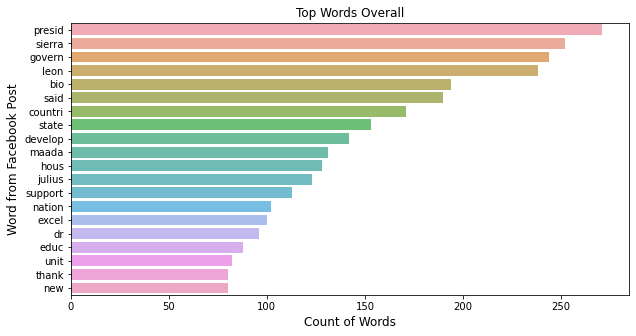

In [58]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df = df[:20]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index,alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Facebook Post', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.savefig('Top_Words_Mentioned_SH.png', transparent=False, bbox_inches ='tight')
plt.show()

In [59]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

C:\Users\V4C\Anaconda3\envs\test2\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [60]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [61]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

C:\Users\V4C\Anaconda3\envs\test2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


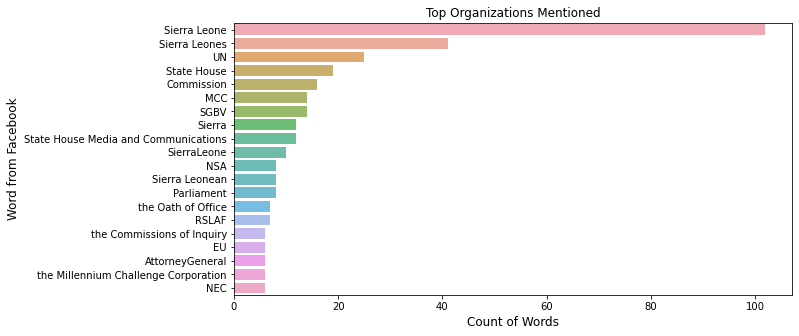

In [62]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Facebook', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.savefig('Top_Orgs_Mentioned_SH.png', transparent=False, bbox_inches ='tight')
plt.show()

In [63]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

C:\Users\V4C\Anaconda3\envs\test2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


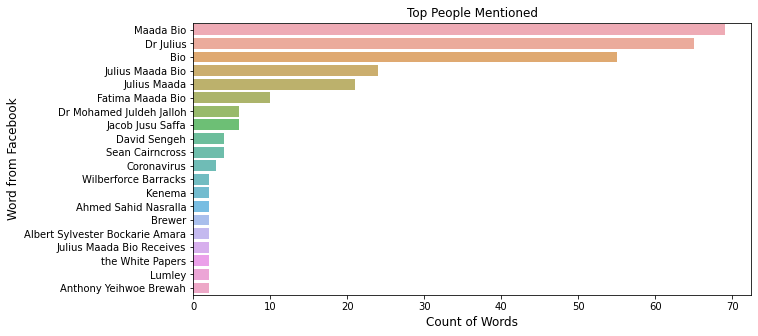

In [64]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Facebook', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.savefig('Top_People_Mentioned_SH.png', transparent=False, bbox_inches ='tight')
plt.show()

